# Regressional Goodhart  

Regressional Goodhart happens when there is a less than perfect correlation between the proxy and goal. This means that when we select for the proxy, we select not only for the true goal, but ***also for the difference between the proxy and the goal***. This is closely related to the the "tails come apart" phenomenon, regression to the mean, and the optimizer's curse. 

## Model  
$$proxy = goal + noise$$  

Due to the noise, a point with a large proxy value will likely have a large goal value, **and** a large noise value. So when the proxy has large value, we can expect the goal to be smaller. This is the simplest Goodhart effect, and also the most fundamental. As long as our goal is not exactly the same as our proxy, we cannot avoid regressional Goodhart.

## Example  

Suppose our goal is to find the student with the most knowledge. Let's assume we have 300 students and that knowledge is normally distributed.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

num_students = 300
knowledge = np.random.normal(loc=50, scale=15, size=num_students)

Since we can't measure knowledge directly, we'll make all of our students take a test. The amount of knowledge a student has plays a role in how well they perform on the test, but we can also expect some noise due to various factors (how well a student feels on test day, what specific topics are tested, etc). So we can model each students test score as $score = knowledge + noise$.

In [16]:
noise = np.random.normal(loc=0, scale=10, size=num_students)
test_scores = knowledge + noise

Let's plot each students knowledge and test score.

Text(0, 0.5, 'Knowledge')

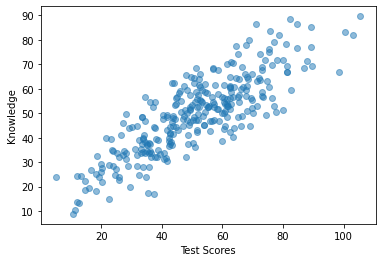

In [17]:
plt.scatter(x=test_scores, y=knowledge, alpha=0.5)
plt.xlabel('Test Scores')
plt.ylabel('Knowledge')

Let's locate the student who did the best on our test (we'll make them red) and the student who has the most knowledge (we'll make them green).

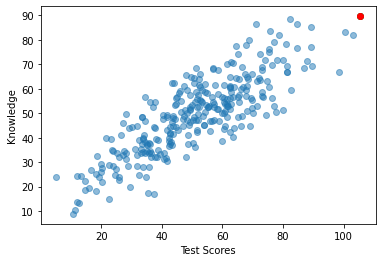

In [18]:
most_knowledge = max(zip(test_scores, knowledge), key=lambda x: x[1])
best_score = max(zip(test_scores, knowledge), key=lambda x: x[0])
plt.scatter(x=test_scores, y=knowledge, alpha=0.5)
plt.xlabel('Test Scores')
plt.ylabel('Knowledge')
plt.scatter(*most_knowledge, color='green')
plt.scatter(*best_score, color='red')

We can see that despite the positive correlation between a student's knowledge and their score on the test, the student who performs the best isn't the most knowledgable (although they do know quite a lot) and the student who knows the most doesn't perform the best (although they do decently).